In [56]:
import schemdraw
import schemdraw.elements as elm

import pandas as pd

In [57]:
from si_prefix import split
from si_prefix import si_format as SI

def R2SI(x):
    xi = x/10**split(x)[1]
    if xi <= 10:
        return SI(x,2)
    elif xi <= 100:
        return SI(x,1)
    elif xi <= 1000:
        return SI(x,0)
    else:
        return SI(x,1)

https://schemdraw.readthedocs.io/en/latest/elements/elements.html

# VdV

## NUMÉRICO

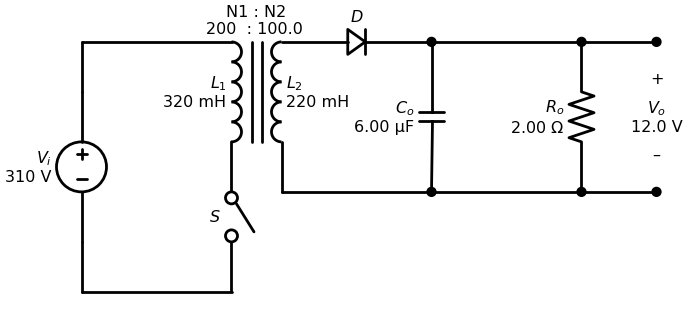

In [58]:
VdV = pd.read_csv("../data/VdV.csv", sep=";")
VdV = VdV.set_index("Var")

with schemdraw.Drawing() as d:
    d.config(fontsize=13)
    Vi_str = f"$V_i$\n{R2SI(VdV['Val']['Vi'])}V"
    Vi = elm.SourceV().up().label(Vi_str)
    L1_str = f"$L_1$\n{R2SI(VdV['Val']['L1'])}H"
    L2_str = f"$L_2$\n{R2SI(VdV['Val']['L2'])}H"
    N1_str = f"$N_1$\n{R2SI(VdV['Val']['N1'])}"
    N2_str = f"$N_2$\n{R2SI(VdV['Val']['N2'])}"
    TR1_str = f"{L1_str}\n{N1_str}"
    TR2_str = f"{L2_str}\n{N2_str}"
    TRN_str = f"N1 : N2\n{R2SI(VdV['Val']['N1'])} : {R2SI(VdV['Val']['N2'])}"
    Tr = elm.Transformer(t1=5, t2=5).label(L1_str,"lft").label(L2_str,"rgt").label(TRN_str)
    S = elm.Switch().label("$S$")
    D = elm.Diode().label("$D$")
    Co_str = f"$C_o$\n{R2SI(VdV['Val']['Co'])}F"
    Co = elm.Capacitor().label(Co_str)
    Ro_str = f"$R_o$\n{R2SI(VdV['Val']['Ro'])}$\Omega$"
    Ro = elm.Resistor().label(Ro_str)
    Vo_str = f"$V_o$\n{R2SI(VdV['Val']['Vo'])}V"
    Vo = elm.Gap().label(("+",Vo_str,"–"))

    d += Vi
    d += elm.Line().up().length(d.unit/3)
    d += elm.Line().right()
    d += Tr.right().anchor("p1")

    d += S.down().at(Tr.p2)
    d += elm.Line().left()
    d += elm.Line().up().length(d.unit/3)

    d += D.right().at(Tr.s1)
    d += elm.Dot()
    d.push(); d += Co.down(); d.pop()
    d += elm.Line().right()
    d += elm.Dot()
    d.push(); d += Ro.down(); d.pop()
    d += elm.Line().right().length(d.unit/2)
    d += elm.Dot()
    d += Vo.down()
    d += elm.Dot()
    d += elm.Line().left().length(d.unit/2)
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().up().length(d.unit/3)

    # d.save(fname=f"../images/circuitos/VdV.png", dpi=300)

## Etapa 1

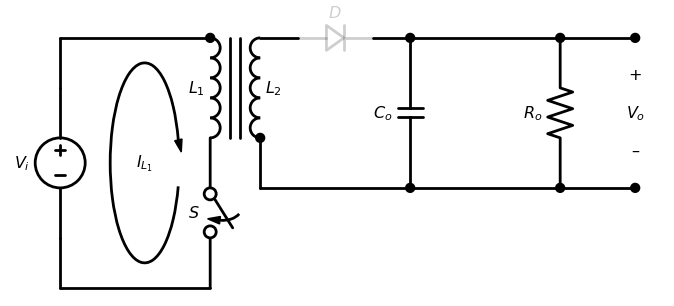

In [59]:
with schemdraw.Drawing() as d:
	d.config(fontsize=13)
	Vi = elm.SourceV().up().label("$V_i$")
	Tr = elm.Transformer(t1=5, t2=5).label("$L_1$","lft").label("$L_2$","rgt")
	S = elm.Switch(action="close").label("$S$")
	D = elm.Diode().label("$D$").color("#00000031")
	Co = elm.Capacitor().label("$C_o$")
	Ro = elm.Resistor().label("$R_o$")
	Vo = elm.Gap().label(("+","$V_o$","–"))

	d += Vi
	d += elm.Line().up().length(d.unit/3) # Lin1
	d += (Lin2 := elm.Line().right().length(d.unit))
	d += Tr.right().anchor("p1")
	d += elm.Dot()

	d += S.down().at(Tr.p2)
	d += (Lin3 := elm.Line().left().length(d.unit))
	d += elm.Line().up().length(d.unit/3) # Lin4

	d += elm.LoopCurrent([Lin2,S,Lin3,Vi], pad=0.5).label("$I_{L_1}$")
	
	d += elm.Line().at(Tr.s1).right().length(d.unit/4)
	d += D.right().length(d.unit/2)
	d += elm.Line().right().length(d.unit/4)
	d += elm.Dot()
	d.push(); d += Co.down(); d.pop()
	d += elm.Line().right() #Lin5
	d += elm.Dot()
	d.push(); d += Ro.down(); d.pop()
	d += elm.Line().right().length(d.unit/2) # Lin6
	d += elm.Dot()
	d += Vo.down()
	d += elm.Dot()
	d += elm.Line().left().length(d.unit/2) # Lin7
	d += elm.Dot()
	d += elm.Line().left() # Lin8
	d += elm.Dot()
	d += elm.Line().left() # Lin9
	d += elm.Line().up().length(d.unit/3) # Lin10
	d += elm.Dot()

	d.save(fname=f"../images/circuitos/VdV_e1.png", dpi=300)

## Etapa 2

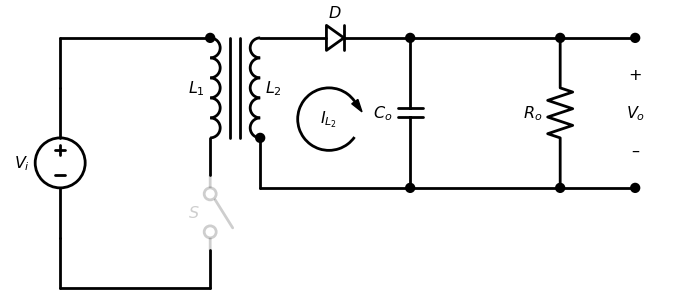

In [60]:
with schemdraw.Drawing() as d:
	d.config(fontsize=13)
	Vi = elm.SourceV().up().label("$V_i$")
	Tr = elm.Transformer(t1=5, t2=5).label("$L_1$","lft").label("$L_2$","rgt")
	S = elm.Switch().label("$S$").color("#00000031")
	D = elm.Diode().label("$D$")
	Co = elm.Capacitor().label("$C_o$")
	Ro = elm.Resistor().label("$R_o$")
	Vo = elm.Gap().label(("+","$V_o$","–"))

	d += Vi
	d += elm.Line().up().length(d.unit/3) # Lin1
	d += elm.Line().right().length(d.unit) # Lin2
	d += Tr.right().anchor("p1")
	d += elm.Dot()

	d += elm.Line().down().at(Tr.p2).length(d.unit/4)
	d += S.length(d.unit/2)
	d += elm.Line().length(d.unit/4)
	d += elm.Line().left() # Lin3
	d += elm.Line().up().length(d.unit/3) # Lin4

	d += D.right().at(Tr.s1)
	d += elm.Dot()
	d.push(); d += Co.down(); d.pop()
	d += elm.Line().right() #Lin5
	d += elm.Dot()
	d.push(); d += Ro.down(); d.pop()
	d += elm.Line().right().length(d.unit/2) # Lin6
	d += elm.Dot()
	d += Vo.down()
	d += elm.Dot()
	d += elm.Line().left().length(d.unit/2) # Lin7
	d += elm.Dot()
	d += elm.Line().left() # Lin8
	d += elm.Dot()
	d += (Lin9 := elm.Line().left()) # Lin9
	d += (Lin10 := elm.Line().up().length(d.unit/3)) # Lin10
	d += elm.Dot()

	d += elm.LoopCurrent([D,Co,Lin9,Tr], pad=0.75).label("$I_{L_2}$")

	d.save(fname=f"../images/circuitos/VdV_e2.png", dpi=300)

## Etapa 3

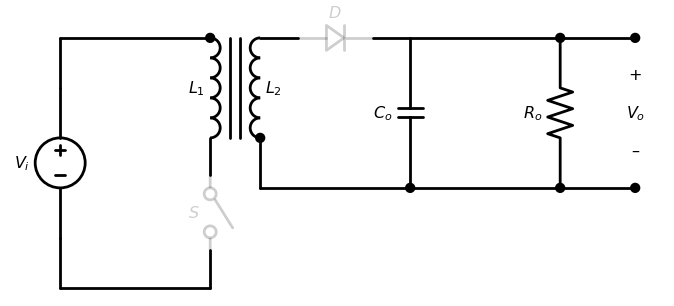

In [61]:
with schemdraw.Drawing() as d:
	d.config(fontsize=13)
	Vi = elm.SourceV().up().label("$V_i$")
	Tr = elm.Transformer(t1=5, t2=5).label("$L_1$","lft").label("$L_2$","rgt")
	S = elm.Switch().label("$S$").color("#00000031")
	D = elm.Diode().label("$D$").color("#00000031")
	Co = elm.Capacitor().label("$C_o$")
	Ro = elm.Resistor().label("$R_o$")
	Vo = elm.Gap().label(("+","$V_o$","–"))

	d += Vi
	d += elm.Line().up().length(d.unit/3) # Lin1
	d += elm.Line().right().length(d.unit) # Lin2
	d += Tr.right().anchor("p1")
	d += elm.Dot()

	d += elm.Line().down().at(Tr.p2).length(d.unit/4)
	d += S.length(d.unit/2)
	d += elm.Line().length(d.unit/4)
	d += elm.Line().left() # Lin3
	d += elm.Line().up().length(d.unit/3) # Lin4

	d += elm.Line().at(Tr.s1).right().length(d.unit/4)
	d += D.right().length(d.unit/2)
	d += elm.Line().right().length(d.unit/4)
	d.push(); d += Co.down(); d.pop()
	d += elm.Line().right() #Lin5
	d += elm.Dot()
	d.push(); d += Ro.down(); d.pop()
	d += elm.Line().right().length(d.unit/2) # Lin6
	d += elm.Dot()
	d += Vo.down()
	d += elm.Dot()
	d += elm.Line().left().length(d.unit/2) # Lin7
	d += elm.Dot()
	d += elm.Line().left() # Lin8
	d += elm.Dot()
	d += elm.Line().left() # Lin9
	d += elm.Line().up().length(d.unit/3) # Lin10
	d += elm.Dot()

	d.save(fname=f"../images/circuitos/VdV_e3.png", dpi=300)